In [1]:
# Reading in the data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import matplotlib 
import sklearn 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search
import ipywidgets as widgets
from ipywidgets import FloatSlider, fixed
from ipywidgets.widgets.widget_selection import SelectionSlider

/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv('../csvs/initial_orbital_elements.csv', index_col=0)
del df['instability_time']
del df['Rel_Eerr']
Nrows = df.shape[0]
df.head()
print Nrows, len(np.where(df['Stable']==0)[0])

25000 15092


In [3]:
df_X= df.ix[:,2:]
df_Y=df['Stable']
df_X.head()

,RHill12,RHill23,beta12,beta23,m1,a1,P1,e1,pomega1,inc1,...,Omega2,f2,m3,a3,P3,e3,pomega3,inc3,Omega3,f3
0,0.026033,0.023222,8.508586,15.826967,3.414016e-05,1.0,0.999983,0.005031,3.171041,0.008978,...,1.573978,-0.567081,1.826900e-06,1.589043,2.003050,0.002515,-0.108162,0.065498,-1.192440,-0.614709
1,0.022704,0.031284,8.397002,15.367618,2.529838e-07,1.0,1.000000,0.010350,-3.564030,0.001541,...,-1.749616,1.437355,1.955797e-05,1.671403,2.160777,0.072450,-0.343874,0.046939,-0.619350,0.192203
2,0.036304,0.032149,3.461288,25.229467,7.380789e-05,1.0,0.999963,0.051912,0.995149,0.016289,...,-0.032550,-0.317958,1.477931e-07,1.936762,2.695151,0.003395,3.419165,0.014535,2.795101,1.685406
3,0.011704,0.014963,18.513681,19.145889,5.174804e-07,1.0,1.000000,0.000152,-3.328433,0.003301,...,0.946351,-2.294238,1.287851e-06,1.503164,1.842927,0.057380,-0.829096,0.098014,-2.995941,-1.625763
4,0.006199,0.008634,5.494196,2.928938,5.106746e-07,1.0,1.000000,0.001457,1.738448,0.033910,...,-0.455684,-1.074927,1.542321e-06,1.059346,1.090326,0.010325,-1.214839,0.011840,-1.253823,1.215392


In [5]:
model = XGBClassifier(seed=27, learning_rate=0.1, n_estimators=100) # taken from fitting ROC_AUC

In [6]:
Nfolds = 5
max_depth = [6,12,18]
min_child_weight = np.logspace(-1,2,3)
param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)

In [6]:
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring='average_precision',iid=False, cv=Nfolds, verbose = 15, n_jobs = -1 )
grid.fit(df.ix[:, 2:],df['Stable'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=6, min_child_weight=0.1 ...............................
[CV] max_depth=6, min_child_weight=0.1 ...............................
[CV] ...... max_depth=6, min_child_weight=0.1, score=0.954151 -  26.4s
[CV] max_depth=6, min_child_weight=0.1 ...............................


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.5s


[CV] ...... max_depth=6, min_child_weight=0.1, score=0.959085 -  27.3s
[CV] max_depth=6, min_child_weight=0.1 ...............................


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   27.4s


[CV] ...... max_depth=6, min_child_weight=0.1, score=0.957190 -  23.6s
[CV] max_depth=6, min_child_weight=0.1 ...............................


[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   50.1s


[CV] ...... max_depth=6, min_child_weight=0.1, score=0.959837 -  22.9s
[CV] max_depth=6, min_child_weight=3.16227766017 .....................


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   50.3s


[CV]  max_depth=6, min_child_weight=3.16227766017, score=0.954599 -  23.1s
[CV] max_depth=6, min_child_weight=3.16227766017 .....................


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min


[CV] ...... max_depth=6, min_child_weight=0.1, score=0.959276 -  24.9s
[CV] max_depth=6, min_child_weight=3.16227766017 .....................


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.3min


[CV]  max_depth=6, min_child_weight=3.16227766017, score=0.959653 -  27.7s
[CV] max_depth=6, min_child_weight=3.16227766017 .....................
[CV]  max_depth=6, min_child_weight=3.16227766017, score=0.957696 -  26.3s
[CV] max_depth=6, min_child_weight=3.16227766017 .....................


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.7min


[CV]  max_depth=6, min_child_weight=3.16227766017, score=0.959819 -  27.4s
[CV] max_depth=6, min_child_weight=100.0 .............................


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min


[CV]  max_depth=6, min_child_weight=3.16227766017, score=0.959590 -  28.7s
[CV] max_depth=6, min_child_weight=100.0 .............................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min


[CV] .... max_depth=6, min_child_weight=100.0, score=0.947538 -  19.8s
[CV] max_depth=6, min_child_weight=100.0 .............................


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.5min


[CV] .... max_depth=6, min_child_weight=100.0, score=0.952649 -  19.2s
[CV] max_depth=6, min_child_weight=100.0 .............................


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.5min


[CV] .... max_depth=6, min_child_weight=100.0, score=0.951090 -  17.6s
[CV] max_depth=6, min_child_weight=100.0 .............................


[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.8min


[CV] .... max_depth=6, min_child_weight=100.0, score=0.953756 -  20.1s
[CV] max_depth=12, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.8min


[CV] .... max_depth=6, min_child_weight=100.0, score=0.949915 -  14.4s
[CV] max_depth=12, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  3.0min


[CV] ..... max_depth=12, min_child_weight=0.1, score=0.951294 - 1.4min
[CV] max_depth=12, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.2min


[CV] ..... max_depth=12, min_child_weight=0.1, score=0.957413 - 1.3min
[CV] max_depth=12, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.3min


[CV] ..... max_depth=12, min_child_weight=0.1, score=0.951462 -  58.5s
[CV] max_depth=12, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  5.2min


[CV] ..... max_depth=12, min_child_weight=0.1, score=0.958079 -  57.7s
[CV] max_depth=12, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:  5.3min


[CV]  max_depth=12, min_child_weight=3.16227766017, score=0.954333 -  48.8s
[CV] max_depth=12, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:  6.1min


[CV] ..... max_depth=12, min_child_weight=0.1, score=0.958164 - 1.1min
[CV] max_depth=12, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.3min


[CV]  max_depth=12, min_child_weight=3.16227766017, score=0.960074 -  54.0s
[CV] max_depth=12, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:  7.0min


[CV]  max_depth=12, min_child_weight=3.16227766017, score=0.957514 -  51.6s
[CV] max_depth=12, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:  7.2min


[CV]  max_depth=12, min_child_weight=3.16227766017, score=0.960225 -  41.0s
[CV] max_depth=12, min_child_weight=100.0 ............................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.7min


[CV]  max_depth=12, min_child_weight=3.16227766017, score=0.958435 -  39.6s
[CV] max_depth=12, min_child_weight=100.0 ............................


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.8min


[CV] ... max_depth=12, min_child_weight=100.0, score=0.947570 -  16.9s
[CV] max_depth=12, min_child_weight=100.0 ............................


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  8.0min


[CV] ... max_depth=12, min_child_weight=100.0, score=0.952228 -  18.3s
[CV] max_depth=12, min_child_weight=100.0 ............................


[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:  8.2min


[CV] ... max_depth=12, min_child_weight=100.0, score=0.950927 -  15.0s
[CV] max_depth=12, min_child_weight=100.0 ............................


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  8.2min


[CV] ... max_depth=12, min_child_weight=100.0, score=0.953395 -  16.3s
[CV] max_depth=18, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  8.4min


[CV] ... max_depth=12, min_child_weight=100.0, score=0.949396 -  20.8s
[CV] max_depth=18, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  8.6min


[CV] ..... max_depth=18, min_child_weight=0.1, score=0.950480 - 1.6min
[CV] max_depth=18, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed: 10.0min


[CV] ..... max_depth=18, min_child_weight=0.1, score=0.957926 - 1.5min
[CV] max_depth=18, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed: 10.1min


[CV] ..... max_depth=18, min_child_weight=0.1, score=0.951211 -  58.8s
[CV] max_depth=18, min_child_weight=0.1 ..............................


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.0min


[CV] ..... max_depth=18, min_child_weight=0.1, score=0.956732 - 1.1min
[CV] max_depth=18, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.2min


[CV]  max_depth=18, min_child_weight=3.16227766017, score=0.954204 -  52.0s
[CV] max_depth=18, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed: 12.0min


[CV] ..... max_depth=18, min_child_weight=0.1, score=0.956532 - 1.4min
[CV] max_depth=18, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed: 12.4min


[CV]  max_depth=18, min_child_weight=3.16227766017, score=0.961120 -  43.2s
[CV] max_depth=18, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.8min


[CV]  max_depth=18, min_child_weight=3.16227766017, score=0.955793 -  32.8s
[CV] max_depth=18, min_child_weight=3.16227766017 ....................


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed: 12.9min


[CV]  max_depth=18, min_child_weight=3.16227766017, score=0.960376 -  36.6s
[CV] max_depth=18, min_child_weight=100.0 ............................


[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed: 13.4min


[CV] ... max_depth=18, min_child_weight=100.0, score=0.947570 -  17.5s
[CV] max_depth=18, min_child_weight=100.0 ............................


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed: 13.7min


[CV]  max_depth=18, min_child_weight=3.16227766017, score=0.958638 -  46.8s
[CV] max_depth=18, min_child_weight=100.0 ............................


[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed: 13.7min


[CV] ... max_depth=18, min_child_weight=100.0, score=0.952228 -  16.1s
[CV] max_depth=18, min_child_weight=100.0 ............................


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.9min


[CV] ... max_depth=18, min_child_weight=100.0, score=0.950927 -  17.8s
[CV] max_depth=18, min_child_weight=100.0 ............................
[CV] ... max_depth=18, min_child_weight=100.0, score=0.953395 -  14.7s
[CV] ... max_depth=18, min_child_weight=100.0, score=0.949396 -  10.5s


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 14.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=1),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'max_depth': [6, 12, 18], 'min_child_weight': array([   0.1    ,    3.16228,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring='average_precision',
       verbose=15)

In [6]:
# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

In [7]:
%matplotlib inline
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plotgrid(grid, vmin, vmax, midpoint):
    param_grid = grid.param_grid
    
    # get the names of the parameters
    param1 = param_grid.keys()[0]
    param2 = param_grid.keys()[1]

    # plot the scores of the grid
    # grid_scores_ contains parameter settings and scores
    # We extract just the scores
    scores = np.fabs([x[1] for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param1]), len(param_grid[param2]))

    plt.figure(figsize=(12, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=midpoint))
    plt.xlabel(param2)
    plt.ylabel(param1)
    plt.colorbar()
    plt.xticks(np.arange(len(param_grid[param2])), np.round(param_grid[param2], decimals=2))
    plt.yticks(np.arange(len(param_grid[param1])), np.round(param_grid[param1], decimals=2))
    plt.title('CV Score')
    plt.show()
       
def plot1dcut(grid, param_names, fixed_param_name, fixed_value_name):
    fixed_value = float(fixed_value_name)
    param_grid = grid.param_grid
    
    # Each entry x in grid.grid_scores_ has all the CV scores in x[2]
    scores = np.fabs([np.mean(x[2]) for x in grid.grid_scores_])
    stds = np.fabs([np.std(x[2]) for x in grid.grid_scores_])
    scores = np.array(scores).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    stds = np.array(stds).reshape(len(param_grid[param_names[0]]), len(param_grid[param_names[1]]))
    
    plt.figure(figsize=(8, 6))
    fig, ax = plt.subplots()
    
    if fixed_param_name == param_names[0]:
        xvals = param_grid[param_names[1]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[mask,:].flatten()
        errs = stds[mask,:].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[1])

    elif fixed_param_name == param_names[1]:
        xvals = param_grid[param_names[0]] # take all the values in param grid for the other parameter
        mask = np.isclose(np.array(grid.param_grid[fixed_param_name]), fixed_value) # make masked array of passed parameter to pick out right index
        yvals = scores[:,mask].flatten()
        errs = stds[:,mask].flatten()/np.sqrt(Nfolds)
        ax.set_xlabel(param_names[0])

    ax.errorbar(xvals, yvals, errs)
    ax.set_ylabel('CV score')
    ax.set_title("{0} = {1}".format(fixed_param_name, fixed_value))
    plt.show()

In [8]:
def plot_grid_Scores(grid):
    #plot map of performance across the parameter space

    # get the scores and values for the sliders
    scores = np.fabs([x[1] for x in grid.grid_scores_])
    vmin = np.min(scores)
    vmax = np.max(scores)
    mean = np.mean(scores)
    step = (vmax-vmin)/100.

    widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

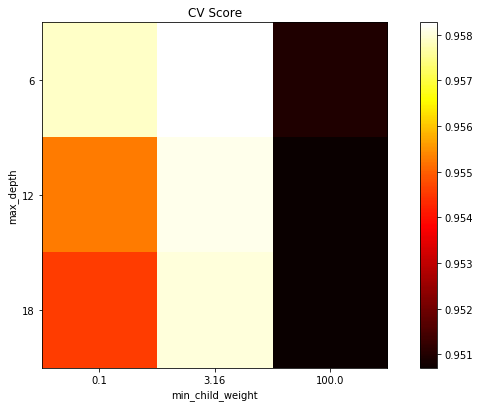

<function __main__.plotgrid>

In [10]:
plot_grid_Scores(grid)

From the above grid, it seems that having a min child weight of about with order of magnitude ~1 regardless of max depth is a good parameter space to get a good score, but only marginally so.

Try manual hand tunning, since even running a small grid took 15 min, a tigher grid will tkae that much longer
General Guidelines:

1)adjust depth (integer), starts at 6, then 8, 10....(6-12-18 is common) Stop increasing when CV performance drops. 

2)adjust col_sample_by tree and subsample. Standard values are between 0.5-1

3)adjust min_child_weight (note: this is a float). try values from 0.1 to 10, some data benefit with 150-200.

4)adjust eta and n_round (estimators in concert). eta=0.1 is a good start, but optimal is typically 0.05 to 1e-3. n_round optimal is typically from 1000 to 12000 in my experience.

In [9]:
min_child_w = 3
n_est=100
max_d = 8
learning_r = 0.1
model2 = XGBClassifier(min_child_weight=min_child_w, n_estimators=n_est, max_depth=max_d, learning_rate=learning_r)
from sklearn.model_selection import cross_val_score

In [8]:
score = cross_val_score(estimator=model2, n_jobs=-1, cv = 5, X = df_X, y = df_Y, scoring ='average_precision', verbose = 5)

[CV]  ................................................................
[CV]  ................................................................
[CV] ................................. , score=0.959790, total=  36.1s
[CV]  ................................................................
[CV] ................................. , score=0.956826, total=  36.5s
[CV]  ................................................................
[CV] ................................. , score=0.956826, total=  30.3s
[CV]  ................................................................
[CV] ................................. , score=0.961051, total=  30.6s
[CV] ................................. , score=0.958689, total=   6.8s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [10]:
def scoring (model, scoring = 'f1'):
    score = cross_val_score(estimator=model2, n_jobs=-1, cv = 5, X = df_X, y = df_Y, scoring =scoring, verbose = 5)
    print('This is the std of the model scores: %f', np.std(score))
    print('This is the average score from CV: %f', np.mean(score))


In [10]:
scoring (model2)

[CV]  ................................................................
[CV]  ................................................................
[CV] ................................. , score=0.883249, total=  24.9s
[CV]  ................................................................
[CV] ................................. , score=0.890499, total=  25.8s
[CV]  ................................................................
[CV] ................................. , score=0.884746, total=  28.8s
[CV]  ................................................................
[CV] ................................. , score=0.879863, total=  28.0s
[CV] ................................. , score=0.889080, total=   6.5s
('This is the std of the model scores: %f', 0.0038784313340582471)
('This is the average score from CV: %f', 0.88548723148285102)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


In [11]:
from sklearn.metrics import classification_report
Nrows = df.shape[0]
Nrows_train = int(Nrows*0.1) # use 10% total

trainData = df_X.iloc[:Nrows_train/2]
testData = df_X.iloc[Nrows_train/2:Nrows_train]
#print trainData.shape
trainY = df_Y[:Nrows_train/2]
#testData = df_X.iloc[Nrows_train:]
testY = df_Y[Nrows_train/2:Nrows_train]
model2.fit(trainData, trainY)
predY = model2.predict(testData)
print metrics.accuracy_score(testY, predY), metrics.f1_score(testY, predY)
#scoring(model2)
cm = metrics.confusion_matrix(testY, predY, labels=[1, 0]) #stable, unstable


0.868 0.831918505942


In [12]:
#dtrain_predprob = model2.fit
model2.fit(trainData, trainY)
dtest_predprob = model2.predict_proba(testData)[:,1]
#print dtest_predprob[:][:5]


Model Report
Accuracy : 0.868
AUC Score (Test): 0.930540


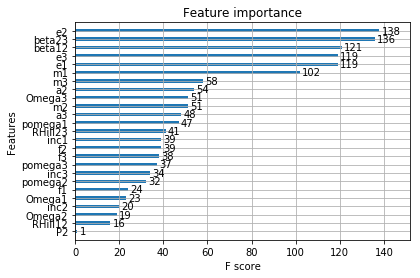

In [13]:
#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(testY, predY)
#print "AUC Score (Train): %f" % metrics.roc_auc_score(df['Stable'], dtrain_predprob)
print "AUC Score (Test): %f" % metrics.average_precision_score(testY, dtest_predprob)

xgb.plot_importance(model2, height = 0.4 )

In [14]:
import matplotlib
%matplotlib inline
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Stable', 'Unstable'], rotation=45)
    plt.yticks(tick_marks, ['Stable', 'Unstable'])
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.clf()
    plt.show()
plot_confusion_matrix(cm)

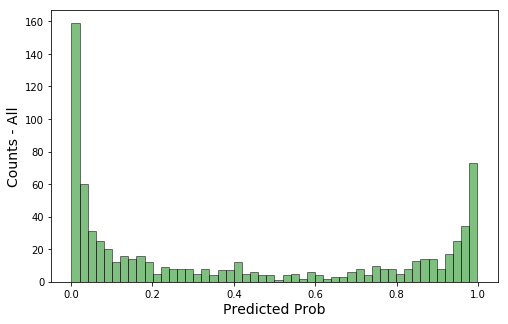

In [14]:
fig, ax= plt.subplots(figsize=(8, 5))
ax.hist(dtest_predprob, bins=50, alpha=0.5, color='green', linewidth = 1, edgecolor='black',)
ax.set_xlabel('Predicted Prob', fontsize=14)
ax.set_ylabel('Counts - All', fontsize=14)
plt.show()

Compare prediction results to weather they were stable or unstable

[ 0.95075196  0.16707779  0.41528997  0.16427894  0.9468655 ]
304 446


(0, 40)

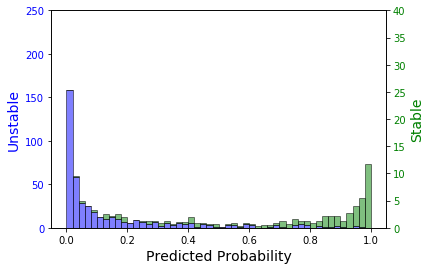

In [15]:
# Histogram:

bins = 50
pred_prob= model2.predict_proba(testData)[:,1]
Stable=pred_prob[np.where(testY==1)]
print Stable[:5][:]
Unstable=pred_prob[np.where(testY==0)]
print Stable.size, Unstable.size

fig, ax1 = plt.subplots()
ax1.hist([Unstable, Stable], bins, alpha=0.5, label='No', color=['blue', 'green'], linewidth = 1, edgecolor='black', histtype='barstacked')
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    

ax2 = ax1.twinx()
#ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green', linewidth = 1, edgecolor='black', histtype='barstacked')
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
 
#ax1.set_ylim(ax2.get_ylim())
ax1.set_ylim([0,250])
ax2.set_ylim([0,40])

Make a tighter grid

In [16]:
model3 = XGBClassifier(seed = 3, n_estimators=100, learning_rate=0.1, max_depth=4, min_child_weight=np.log10(1.5))
model3.fit(df_X.iloc[:Nrows_train/2], df_Y[:Nrows_train/2])
pred = model3.predict(df_X.iloc[Nrows_train/2:Nrows_train])
print np.logspace(np.log10(1.5),np.log10(10), 6)
print df_X.iloc[:Nrows_train].shape

[  1.5          2.19216383   3.2037215    4.68205492   6.84255429  10.        ]
(1499, 28)


In [18]:
model3 = XGBClassifier(seed = 3, n_estimators=100, learning_rate=0.1)

max_depth = [4,6,8,10, 12, 14]
min_child_weight = np.logspace(np.log10(1.5),np.log10(10), 6)
#n_estim = [200]

param_grid = dict(max_depth=max_depth, min_child_weight=min_child_weight)
grid = GridSearchCV(estimator = model3, param_grid = param_grid, scoring='average_precision',iid=False,cv=5, verbose = 15)
grid.fit(df_X.iloc[:Nrows_train], df_Y[:Nrows_train]) #10% of total dataset

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, min_child_weight=1.5 ...............................
[CV] ...... max_depth=4, min_child_weight=1.5, score=0.893787 -   1.5s
[CV] max_depth=4, min_child_weight=1.5 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ...... max_depth=4, min_child_weight=1.5, score=0.914440 -   9.1s
[CV] max_depth=4, min_child_weight=1.5 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s


[CV] ...... max_depth=4, min_child_weight=1.5, score=0.942746 -   4.3s
[CV] max_depth=4, min_child_weight=1.5 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.0s remaining:    0.0s


[CV] ...... max_depth=4, min_child_weight=1.5, score=0.946287 -   1.3s
[CV] max_depth=4, min_child_weight=1.5 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.3s remaining:    0.0s


[CV] ...... max_depth=4, min_child_weight=1.5, score=0.954174 -   1.0s
[CV] max_depth=4, min_child_weight=2.19216382743 .....................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.3s remaining:    0.0s


[CV]  max_depth=4, min_child_weight=2.19216382743, score=0.887869 -   3.8s
[CV] max_depth=4, min_child_weight=2.19216382743 .....................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.1s remaining:    0.0s


[CV]  max_depth=4, min_child_weight=2.19216382743, score=0.918228 -   2.1s
[CV] max_depth=4, min_child_weight=2.19216382743 .....................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.1s remaining:    0.0s


[CV]  max_depth=4, min_child_weight=2.19216382743, score=0.945267 -   2.4s
[CV] max_depth=4, min_child_weight=2.19216382743 .....................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   25.6s remaining:    0.0s


[CV]  max_depth=4, min_child_weight=2.19216382743, score=0.949559 -   8.8s
[CV] max_depth=4, min_child_weight=2.19216382743 .....................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   34.3s remaining:    0.0s


[CV]  max_depth=4, min_child_weight=2.19216382743, score=0.954618 -   8.8s
[CV] max_depth=4, min_child_weight=3.20372149754 .....................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   43.1s remaining:    0.0s


[CV]  max_depth=4, min_child_weight=3.20372149754, score=0.895718 -   8.7s
[CV] max_depth=4, min_child_weight=3.20372149754 .....................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   51.8s remaining:    0.0s


[CV]  max_depth=4, min_child_weight=3.20372149754, score=0.911565 -   4.3s
[CV] max_depth=4, min_child_weight=3.20372149754 .....................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   56.1s remaining:    0.0s


[CV]  max_depth=4, min_child_weight=3.20372149754, score=0.939810 -   8.3s
[CV] max_depth=4, min_child_weight=3.20372149754 .....................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  1.1min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=3.20372149754, score=0.946535 -   7.9s
[CV] max_depth=4, min_child_weight=3.20372149754 .....................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  1.2min remaining:    0.0s


[CV]  max_depth=4, min_child_weight=3.20372149754, score=0.955781 -   9.2s
[CV] max_depth=4, min_child_weight=4.68205492005 .....................
[CV]  max_depth=4, min_child_weight=4.68205492005, score=0.893882 -   3.9s
[CV] max_depth=4, min_child_weight=4.68205492005 .....................
[CV]  max_depth=4, min_child_weight=4.68205492005, score=0.918794 -   5.8s
[CV] max_depth=4, min_child_weight=4.68205492005 .....................
[CV]  max_depth=4, min_child_weight=4.68205492005, score=0.942635 -   1.6s
[CV] max_depth=4, min_child_weight=4.68205492005 .....................
[CV]  max_depth=4, min_child_weight=4.68205492005, score=0.948996 -   5.6s
[CV] max_depth=4, min_child_weight=4.68205492005 .....................
[CV]  max_depth=4, min_child_weight=4.68205492005, score=0.956419 -   4.1s
[CV] max_depth=4, min_child_weight=6.84255428919 .....................
[CV]  max_depth=4, min_child_weight=6.84255428919, score=0.895590 -   7.9s
[CV] max_depth=4, min_child_weight=6.84255428919 

[CV]  max_depth=8, min_child_weight=3.20372149754, score=0.916453 -   0.8s
[CV] max_depth=8, min_child_weight=3.20372149754 .....................
[CV]  max_depth=8, min_child_weight=3.20372149754, score=0.938215 -   1.2s
[CV] max_depth=8, min_child_weight=3.20372149754 .....................
[CV]  max_depth=8, min_child_weight=3.20372149754, score=0.945455 -   1.2s
[CV] max_depth=8, min_child_weight=3.20372149754 .....................
[CV]  max_depth=8, min_child_weight=3.20372149754, score=0.955836 -   2.2s
[CV] max_depth=8, min_child_weight=4.68205492005 .....................
[CV]  max_depth=8, min_child_weight=4.68205492005, score=0.901818 -   0.8s
[CV] max_depth=8, min_child_weight=4.68205492005 .....................
[CV]  max_depth=8, min_child_weight=4.68205492005, score=0.915405 -   1.0s
[CV] max_depth=8, min_child_weight=4.68205492005 .....................
[CV]  max_depth=8, min_child_weight=4.68205492005, score=0.940812 -   1.1s
[CV] max_depth=8, min_child_weight=4.68205492005 

[CV]  max_depth=12, min_child_weight=2.19216382743, score=0.946269 -   0.5s
[CV] max_depth=12, min_child_weight=2.19216382743 ....................
[CV]  max_depth=12, min_child_weight=2.19216382743, score=0.950643 -   0.6s
[CV] max_depth=12, min_child_weight=3.20372149754 ....................
[CV]  max_depth=12, min_child_weight=3.20372149754, score=0.903283 -   0.8s
[CV] max_depth=12, min_child_weight=3.20372149754 ....................
[CV]  max_depth=12, min_child_weight=3.20372149754, score=0.913730 -   0.5s
[CV] max_depth=12, min_child_weight=3.20372149754 ....................
[CV]  max_depth=12, min_child_weight=3.20372149754, score=0.935062 -   0.6s
[CV] max_depth=12, min_child_weight=3.20372149754 ....................
[CV]  max_depth=12, min_child_weight=3.20372149754, score=0.946735 -   0.5s
[CV] max_depth=12, min_child_weight=3.20372149754 ....................
[CV]  max_depth=12, min_child_weight=3.20372149754, score=0.950317 -   0.5s
[CV] max_depth=12, min_child_weight=4.6820

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  4.0min finished


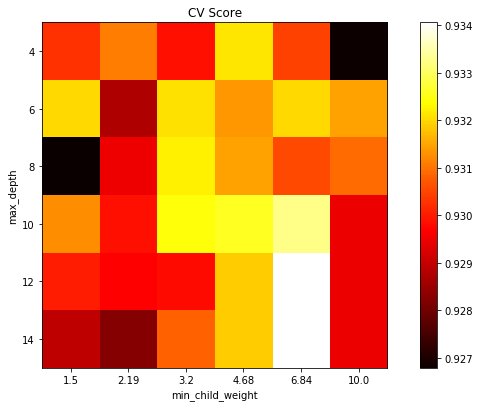

<function __main__.plotgrid>

In [29]:
plot_grid_Scores(grid)

Here, again, it looks like anywhere between 10 to 6 for the max_depth is good as long as you have a min_child_weight with a value of aroung ~3. Scores start decreasing if max_depth goes past 10. 

Lets try varying some of the other parameters with the 90% reduced sample space. Lets now try to adjust colsample_by_tree and subsample

In [35]:
#again, keep the number of estimators and learning rate the same.
model3 = XGBClassifier(seed = 3, n_estimators=100, learning_rate=0.1, colsample_bytree= 0.1)

col_sample = np.linspace(0.1, 1, 10)
subsample = np.linspace(0.6,1, 5)
#n_estim = [200]

param_grid = dict(colsample_bytree=col_sample, subsample = subsample)
grid = GridSearchCV(estimator = model3, param_grid = param_grid, scoring='average_precision',iid=False,cv=5, verbose = 15)
grid.fit(df_X.iloc[:Nrows_train], df_Y[:Nrows_train]) #10% of total dataset

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] subsample=0.5, colsample_bytree=0.1 .............................
[CV] .... subsample=0.5, colsample_bytree=0.1, score=0.797691 -   0.3s
[CV] subsample=0.5, colsample_bytree=0.1 .............................
[CV] .... subsample=0.5, colsample_bytree=0.1, score=0.780390 -   0.1s
[CV] subsample=0.5, colsample_bytree=0.1 .............................
[CV] .... subsample=0.5, colsample_bytree=0.1, score=0.841131 -   0.1s
[CV] subsample=0.5, colsample_bytree=0.1 .............................
[CV] .... subsample=0.5, colsample_bytree=0.1, score=0.823767 -   0.1s
[CV] subsample=0.5, colsample_bytree=0.1 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


[CV] .... subsample=0.5, colsample_bytree=0.1, score=0.838887 -   0.1s
[CV] subsample=0.625, colsample_bytree=0.1 ...........................
[CV] .. subsample=0.625, colsample_bytree=0.1, score=0.789235 -   0.1s
[CV] subsample=0.625, colsample_bytree=0.1 ...........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s


[CV] .. subsample=0.625, colsample_bytree=0.1, score=0.777294 -   0.2s
[CV] subsample=0.625, colsample_bytree=0.1 ...........................
[CV] .. subsample=0.625, colsample_bytree=0.1, score=0.832699 -   0.1s
[CV] subsample=0.625, colsample_bytree=0.1 ...........................
[CV] .. subsample=0.625, colsample_bytree=0.1, score=0.841811 -   0.1s
[CV] subsample=0.625, colsample_bytree=0.1 ...........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.1s remaining:    0.0s


[CV] .. subsample=0.625, colsample_bytree=0.1, score=0.856050 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.1 ............................
[CV] ... subsample=0.75, colsample_bytree=0.1, score=0.803596 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.1 ............................
[CV] ... subsample=0.75, colsample_bytree=0.1, score=0.787078 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.1 ............................
[CV] ... subsample=0.75, colsample_bytree=0.1, score=0.826380 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.1 ............................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.4s remaining:    0.0s


[CV] ... subsample=0.75, colsample_bytree=0.1, score=0.855444 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.1 ............................
[CV] ... subsample=0.75, colsample_bytree=0.1, score=0.866723 -   0.1s
[CV] subsample=0.875, colsample_bytree=0.1 ...........................
[CV] .. subsample=0.875, colsample_bytree=0.1, score=0.783292 -   0.1s
[CV] subsample=0.875, colsample_bytree=0.1 ...........................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.5s remaining:    0.0s


[CV] .. subsample=0.875, colsample_bytree=0.1, score=0.808906 -   0.1s
[CV] subsample=0.875, colsample_bytree=0.1 ...........................
[CV] .. subsample=0.875, colsample_bytree=0.1, score=0.843354 -   0.1s
[CV] subsample=0.875, colsample_bytree=0.1 ...........................
[CV] .. subsample=0.875, colsample_bytree=0.1, score=0.857553 -   0.1s
[CV] subsample=0.875, colsample_bytree=0.1 ...........................
[CV] .. subsample=0.875, colsample_bytree=0.1, score=0.861122 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.1 .............................
[CV] .... subsample=1.0, colsample_bytree=0.1, score=0.810076 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.1 .............................
[CV] .... subsample=1.0, colsample_bytree=0.1, score=0.862228 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.1 .............................
[CV] .... subsample=1.0, colsample_bytree=0.1, score=0.877202 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.1 .............................
[CV] .

[CV] .... subsample=0.5, colsample_bytree=0.4, score=0.896295 -   0.1s
[CV] subsample=0.5, colsample_bytree=0.4 .............................
[CV] .... subsample=0.5, colsample_bytree=0.4, score=0.901382 -   0.1s
[CV] subsample=0.5, colsample_bytree=0.4 .............................
[CV] .... subsample=0.5, colsample_bytree=0.4, score=0.921987 -   0.1s
[CV] subsample=0.5, colsample_bytree=0.4 .............................
[CV] .... subsample=0.5, colsample_bytree=0.4, score=0.946113 -   0.1s
[CV] subsample=0.5, colsample_bytree=0.4 .............................
[CV] .... subsample=0.5, colsample_bytree=0.4, score=0.941327 -   0.1s
[CV] subsample=0.625, colsample_bytree=0.4 ...........................
[CV] .. subsample=0.625, colsample_bytree=0.4, score=0.894583 -   0.1s
[CV] subsample=0.625, colsample_bytree=0.4 ...........................
[CV] .. subsample=0.625, colsample_bytree=0.4, score=0.907799 -   0.1s
[CV] subsample=0.625, colsample_bytree=0.4 ...........................
[CV] .

[CV] .. subsample=0.625, colsample_bytree=0.6, score=0.952053 -   0.1s
[CV] subsample=0.625, colsample_bytree=0.6 ...........................
[CV] .. subsample=0.625, colsample_bytree=0.6, score=0.948615 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.6 ............................
[CV] ... subsample=0.75, colsample_bytree=0.6, score=0.901737 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.6 ............................
[CV] ... subsample=0.75, colsample_bytree=0.6, score=0.905673 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.6 ............................
[CV] ... subsample=0.75, colsample_bytree=0.6, score=0.933509 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.6 ............................
[CV] ... subsample=0.75, colsample_bytree=0.6, score=0.950697 -   0.1s
[CV] subsample=0.75, colsample_bytree=0.6 ............................
[CV] ... subsample=0.75, colsample_bytree=0.6, score=0.950104 -   0.1s
[CV] subsample=0.875, colsample_bytree=0.6 ...........................
[CV] .

[CV] .. subsample=0.875, colsample_bytree=0.8, score=0.909720 -   0.2s
[CV] subsample=0.875, colsample_bytree=0.8 ...........................
[CV] .. subsample=0.875, colsample_bytree=0.8, score=0.934075 -   0.2s
[CV] subsample=0.875, colsample_bytree=0.8 ...........................
[CV] .. subsample=0.875, colsample_bytree=0.8, score=0.946850 -   0.2s
[CV] subsample=0.875, colsample_bytree=0.8 ...........................
[CV] .. subsample=0.875, colsample_bytree=0.8, score=0.956316 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.8 .............................
[CV] .... subsample=1.0, colsample_bytree=0.8, score=0.888205 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.8 .............................
[CV] .... subsample=1.0, colsample_bytree=0.8, score=0.916667 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.8 .............................
[CV] .... subsample=1.0, colsample_bytree=0.8, score=0.937554 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.8 .............................
[CV] .

[CV] .... subsample=1.0, colsample_bytree=1.0, score=0.957338 -   0.3s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   37.8s finished


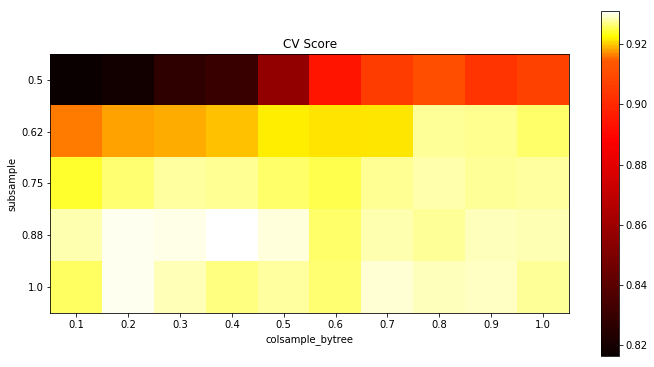

<function __main__.plotgrid>

In [36]:
plot_grid_Scores(grid)

Try with f1 score, since accuracy might not be a good representation since this dataset has about a ~2 to 1 ratio of unstable to stable.

In [37]:
#again, keep the number of estimators and learning rate the same.
model3 = XGBClassifier(seed = 3, n_estimators=100, learning_rate=0.1, colsample_bytree= 0.1)

col_sample = np.linspace(0.1, 1, 10)
subsample = np.linspace(0.7,1, 4)
#n_estim = [200]

param_grid = dict(colsample_bytree=col_sample, subsample = subsample)
grid = GridSearchCV(estimator = model3, param_grid = param_grid, scoring='f1',iid=False,cv=5, verbose = 15)
grid.fit(df_X.iloc[:Nrows_train], df_Y[:Nrows_train]) #10% of total dataset

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] subsample=0.7, colsample_bytree=0.1 .............................
[CV] .... subsample=0.7, colsample_bytree=0.1, score=0.729508 -   0.6s
[CV] subsample=0.7, colsample_bytree=0.1 .............................
[CV] .... subsample=0.7, colsample_bytree=0.1, score=0.689956 -   0.1s
[CV] subsample=0.7, colsample_bytree=0.1 .............................
[CV] .... subsample=0.7, colsample_bytree=0.1, score=0.769874 -   0.1s
[CV] subsample=0.7, colsample_bytree=0.1 .............................
[CV] .... subsample=0.7, colsample_bytree=0.1, score=0.731915 -   0.1s
[CV] subsample=0.7, colsample_bytree=0.1 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s


[CV] .... subsample=0.7, colsample_bytree=0.1, score=0.781513 -   0.1s
[CV] subsample=0.8, colsample_bytree=0.1 .............................
[CV] .... subsample=0.8, colsample_bytree=0.1, score=0.719008 -   0.1s
[CV] subsample=0.8, colsample_bytree=0.1 .............................
[CV] .... subsample=0.8, colsample_bytree=0.1, score=0.711864 -   0.1s
[CV] subsample=0.8, colsample_bytree=0.1 .............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s remaining:    0.0s


[CV] .... subsample=0.8, colsample_bytree=0.1, score=0.781116 -   0.1s
[CV] subsample=0.8, colsample_bytree=0.1 .............................
[CV] .... subsample=0.8, colsample_bytree=0.1, score=0.728814 -   0.1s
[CV] subsample=0.8, colsample_bytree=0.1 .............................
[CV] .... subsample=0.8, colsample_bytree=0.1, score=0.781116 -   0.1s
[CV] subsample=0.9, colsample_bytree=0.1 .............................
[CV] .... subsample=0.9, colsample_bytree=0.1, score=0.728814 -   0.1s
[CV] subsample=0.9, colsample_bytree=0.1 .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.3s remaining:    0.0s


[CV] .... subsample=0.9, colsample_bytree=0.1, score=0.709957 -   0.1s
[CV] subsample=0.9, colsample_bytree=0.1 .............................
[CV] .... subsample=0.9, colsample_bytree=0.1, score=0.758621 -   0.1s
[CV] subsample=0.9, colsample_bytree=0.1 .............................
[CV] .... subsample=0.9, colsample_bytree=0.1, score=0.714286 -   0.1s
[CV] subsample=0.9, colsample_bytree=0.1 .............................
[CV] .... subsample=0.9, colsample_bytree=0.1, score=0.801688 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.1 .............................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.5s remaining:    0.0s


[CV] .... subsample=1.0, colsample_bytree=0.1, score=0.740741 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.1 .............................
[CV] .... subsample=1.0, colsample_bytree=0.1, score=0.760684 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.1 .............................
[CV] .... subsample=1.0, colsample_bytree=0.1, score=0.781893 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.1 .............................
[CV] .... subsample=1.0, colsample_bytree=0.1, score=0.800000 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.1 .............................
[CV] .... subsample=1.0, colsample_bytree=0.1, score=0.784483 -   0.1s
[CV] subsample=0.7, colsample_bytree=0.2 .............................
[CV] .... subsample=0.7, colsample_bytree=0.2, score=0.753036 -   0.1s
[CV] subsample=0.7, colsample_bytree=0.2 .............................
[CV] .... subsample=0.7, colsample_bytree=0.2, score=0.810127 -   0.1s
[CV] subsample=0.7, colsample_bytree=0.2 .............................
[CV] .

[CV] .... subsample=0.9, colsample_bytree=0.4, score=0.871795 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.4 .............................
[CV] .... subsample=1.0, colsample_bytree=0.4, score=0.817460 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.4 .............................
[CV] .... subsample=1.0, colsample_bytree=0.4, score=0.831933 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.4 .............................
[CV] .... subsample=1.0, colsample_bytree=0.4, score=0.830508 -   0.1s
[CV] subsample=1.0, colsample_bytree=0.4 .............................
[CV] .... subsample=1.0, colsample_bytree=0.4, score=0.871369 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.4 .............................
[CV] .... subsample=1.0, colsample_bytree=0.4, score=0.872428 -   0.1s
[CV] subsample=0.7, colsample_bytree=0.5 .............................
[CV] .... subsample=0.7, colsample_bytree=0.5, score=0.803213 -   0.2s
[CV] subsample=0.7, colsample_bytree=0.5 .............................
[CV] .

[CV] .... subsample=0.9, colsample_bytree=0.7, score=0.818565 -   0.3s
[CV] subsample=0.9, colsample_bytree=0.7 .............................
[CV] .... subsample=0.9, colsample_bytree=0.7, score=0.860759 -   0.2s
[CV] subsample=0.9, colsample_bytree=0.7 .............................
[CV] .... subsample=0.9, colsample_bytree=0.7, score=0.872428 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.7 .............................
[CV] .... subsample=1.0, colsample_bytree=0.7, score=0.840816 -   0.3s
[CV] subsample=1.0, colsample_bytree=0.7 .............................
[CV] .... subsample=1.0, colsample_bytree=0.7, score=0.843882 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.7 .............................
[CV] .... subsample=1.0, colsample_bytree=0.7, score=0.827004 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.7 .............................
[CV] .... subsample=1.0, colsample_bytree=0.7, score=0.863071 -   0.2s
[CV] subsample=1.0, colsample_bytree=0.7 .............................
[CV] .

[CV] .... subsample=0.9, colsample_bytree=1.0, score=0.826446 -   0.3s
[CV] subsample=0.9, colsample_bytree=1.0 .............................
[CV] .... subsample=0.9, colsample_bytree=1.0, score=0.814815 -   0.5s
[CV] subsample=0.9, colsample_bytree=1.0 .............................
[CV] .... subsample=0.9, colsample_bytree=1.0, score=0.843882 -   0.3s
[CV] subsample=0.9, colsample_bytree=1.0 .............................
[CV] .... subsample=0.9, colsample_bytree=1.0, score=0.868852 -   0.3s
[CV] subsample=0.9, colsample_bytree=1.0 .............................
[CV] .... subsample=0.9, colsample_bytree=1.0, score=0.887967 -   0.3s
[CV] subsample=1.0, colsample_bytree=1.0 .............................
[CV] .... subsample=1.0, colsample_bytree=1.0, score=0.818182 -   0.3s
[CV] subsample=1.0, colsample_bytree=1.0 .............................
[CV] .... subsample=1.0, colsample_bytree=1.0, score=0.830508 -   0.3s
[CV] subsample=1.0, colsample_bytree=1.0 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   46.0s finished


In [17]:
def plot_grid_Scores(grid):
    #plot map of performance across the parameter space

    # get the scores and values for the sliders
    scores = np.fabs([x[1] for x in grid.grid_scores_])
    vmin = np.min(scores)
    vmax = np.max(scores)
    mean = np.mean(scores)
    step = (vmax-vmin)/100.

    widgets.interact(plotgrid, grid=fixed(grid), vmin=FloatSlider(min=vmin, max=vmax, step=step, value=vmin), 
                 vmax=FloatSlider(min=vmin, max=vmax, step=step, value=vmax), 
                 midpoint=FloatSlider(min=vmin, max=vmax, step=step, value=mean))

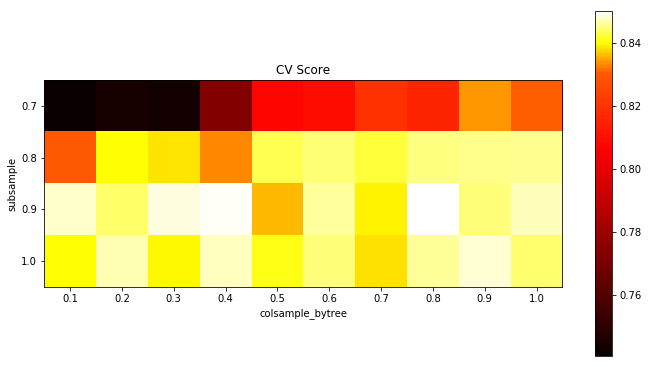

In [45]:
plot_grid_Scores(grid)

Now try varying number of estimators and learning rate on the smaller dataset before we scale up. This assumes that the same paramters that work with a small dataset will still be bale to produce similar scores on the larger dataset. 

In [46]:
model3 = XGBClassifier(seed = 3, colsample_bytree= 0.8)
n_estimators = [100,200,400,800]
learning_rate = np.logspace(-2,.1,5)
param_grid = dict(n_estimators = n_estimators, learning_rate = learning_rate)
grid = GridSearchCV(estimator = model3, param_grid = param_grid, scoring='average_precision',iid=False,cv=5, verbose = 15)
grid.fit(df_X.iloc[:Nrows_train], df_Y[:Nrows_train]) #10% of total dataset

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=100, learning_rate=0.01 ............................
[CV] ... n_estimators=100, learning_rate=0.01, score=0.839841 -   0.4s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ... n_estimators=100, learning_rate=0.01, score=0.816850 -   0.3s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ... n_estimators=100, learning_rate=0.01, score=0.872310 -   0.3s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV] ... n_estimators=100, learning_rate=0.01, score=0.925233 -   0.3s
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


[CV] ... n_estimators=100, learning_rate=0.01, score=0.894537 -   0.3s
[CV] n_estimators=200, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s


[CV] ... n_estimators=200, learning_rate=0.01, score=0.854920 -   0.5s
[CV] n_estimators=200, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s


[CV] ... n_estimators=200, learning_rate=0.01, score=0.854256 -   0.9s
[CV] n_estimators=200, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.0s remaining:    0.0s


[CV] ... n_estimators=200, learning_rate=0.01, score=0.897518 -   0.5s
[CV] n_estimators=200, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.5s remaining:    0.0s


[CV] ... n_estimators=200, learning_rate=0.01, score=0.935382 -   0.5s
[CV] n_estimators=200, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.0s remaining:    0.0s


[CV] ... n_estimators=200, learning_rate=0.01, score=0.923999 -   0.9s
[CV] n_estimators=400, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.9s remaining:    0.0s


[CV] ... n_estimators=400, learning_rate=0.01, score=0.870371 -   1.5s
[CV] n_estimators=400, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.4s remaining:    0.0s


[CV] ... n_estimators=400, learning_rate=0.01, score=0.890198 -   1.0s
[CV] n_estimators=400, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    7.3s remaining:    0.0s


[CV] ... n_estimators=400, learning_rate=0.01, score=0.917569 -   1.8s
[CV] n_estimators=400, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    9.2s remaining:    0.0s


[CV] ... n_estimators=400, learning_rate=0.01, score=0.943540 -   1.5s
[CV] n_estimators=400, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   10.7s remaining:    0.0s


[CV] ... n_estimators=400, learning_rate=0.01, score=0.947179 -   0.9s
[CV] n_estimators=800, learning_rate=0.01 ............................
[CV] ... n_estimators=800, learning_rate=0.01, score=0.885050 -   3.6s
[CV] n_estimators=800, learning_rate=0.01 ............................
[CV] ... n_estimators=800, learning_rate=0.01, score=0.914162 -   1.8s
[CV] n_estimators=800, learning_rate=0.01 ............................
[CV] ... n_estimators=800, learning_rate=0.01, score=0.934147 -   2.2s
[CV] n_estimators=800, learning_rate=0.01 ............................
[CV] ... n_estimators=800, learning_rate=0.01, score=0.947663 -   1.7s
[CV] n_estimators=800, learning_rate=0.01 ............................
[CV] ... n_estimators=800, learning_rate=0.01, score=0.954169 -   1.6s
[CV] n_estimators=100, learning_rate=0.0334965439158 .................
[CV]  n_estimators=100, learning_rate=0.0334965439158, score=0.861340 -   0.2s
[CV] n_estimators=100, learning_rate=0.0334965439158 ................

[CV]  n_estimators=400, learning_rate=0.375837404288, score=0.904732 -   0.8s
[CV] n_estimators=400, learning_rate=0.375837404288 ..................
[CV]  n_estimators=400, learning_rate=0.375837404288, score=0.921651 -   1.0s
[CV] n_estimators=400, learning_rate=0.375837404288 ..................
[CV]  n_estimators=400, learning_rate=0.375837404288, score=0.931337 -   0.7s
[CV] n_estimators=400, learning_rate=0.375837404288 ..................
[CV]  n_estimators=400, learning_rate=0.375837404288, score=0.940256 -   0.8s
[CV] n_estimators=400, learning_rate=0.375837404288 ..................
[CV]  n_estimators=400, learning_rate=0.375837404288, score=0.947977 -   0.7s
[CV] n_estimators=800, learning_rate=0.375837404288 ..................
[CV]  n_estimators=800, learning_rate=0.375837404288, score=0.902981 -   1.5s
[CV] n_estimators=800, learning_rate=0.375837404288 ..................
[CV]  n_estimators=800, learning_rate=0.375837404288, score=0.918653 -   2.7s
[CV] n_estimators=800, learn

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


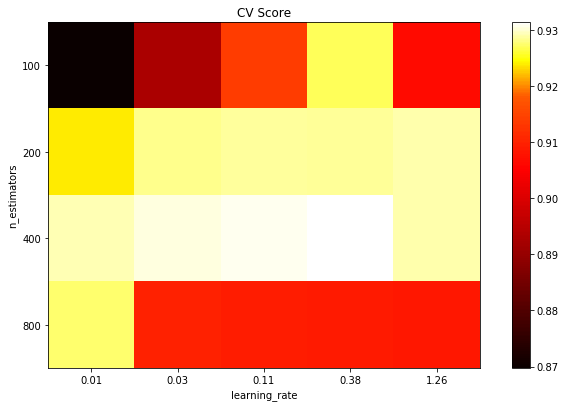

In [47]:
plot_grid_Scores(grid)

Scores seem to decrease if you get above 200 estimators, possibly indicating that this is very prone to overfitting rather quickly? 

Ideal parameters seem to be n_estimators less than 200, max_depth from around 6-10, colsample_by tree greater than 0.5, min_child wieght around 3, and subsample of about 0.9,  and a learning rate of about 0.01. Before moving on , lets try again and vary learning_rate with mich smaller values, < 0.01, and see if that helps to improve the scores.

In [20]:
learning_rate = np.logspace(-4,-3,8)
param_grid = dict(learning_rate = learning_rate)
grid = GridSearchCV(estimator = model3, param_grid = param_grid, scoring='average_precision',iid=False,cv=5, verbose = 10)
grid.fit(df_X.iloc[:Nrows_train], df_Y[:Nrows_train]) #10% of total dataset

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]

param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] learning_rate=0.0001 ............................................
[CV] ................... learning_rate=0.0001, score=0.769554 -   0.5s
[CV] learning_rate=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................... learning_rate=0.0001, score=0.770087 -   0.3s
[CV] learning_rate=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ................... learning_rate=0.0001, score=0.768212 -   0.3s
[CV] learning_rate=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


[CV] ................... learning_rate=0.0001, score=0.807127 -   0.3s
[CV] learning_rate=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV] ................... learning_rate=0.0001, score=0.812477 -   0.3s
[CV] learning_rate=0.000138949549437 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s


[CV] ........ learning_rate=0.000138949549437, score=0.771672 -   0.3s
[CV] learning_rate=0.000138949549437 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.0s remaining:    0.0s


[CV] ........ learning_rate=0.000138949549437, score=0.770087 -   0.3s
[CV] learning_rate=0.000138949549437 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.3s remaining:    0.0s


[CV] ........ learning_rate=0.000138949549437, score=0.768536 -   0.3s
[CV] learning_rate=0.000138949549437 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.5s remaining:    0.0s


[CV] ........ learning_rate=0.000138949549437, score=0.807134 -   0.3s
[CV] learning_rate=0.000138949549437 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.8s remaining:    0.0s


[CV] ........ learning_rate=0.000138949549437, score=0.812360 -   0.3s
[CV] learning_rate=0.000193069772888 .................................
[CV] ........ learning_rate=0.000193069772888, score=0.771257 -   0.5s
[CV] learning_rate=0.000193069772888 .................................
[CV] ........ learning_rate=0.000193069772888, score=0.770087 -   0.3s
[CV] learning_rate=0.000193069772888 .................................
[CV] ........ learning_rate=0.000193069772888, score=0.768423 -   0.7s
[CV] learning_rate=0.000193069772888 .................................
[CV] ........ learning_rate=0.000193069772888, score=0.806863 -   0.3s
[CV] learning_rate=0.000193069772888 .................................
[CV] ........ learning_rate=0.000193069772888, score=0.812718 -   0.3s
[CV] learning_rate=0.000268269579528 .................................
[CV] ........ learning_rate=0.000268269579528, score=0.772778 -   0.3s
[CV] learning_rate=0.000268269579528 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   12.1s finished


In [24]:
print  grid.best_params_, grid.best_score_
print type(grid.grid_scores_)
for i in range (8):
    print grid.grid_scores_[i], "\n"
    
#plot_grid_Scores(grid)

{'learning_rate': 0.001} 0.808348175116
<type 'list'>
mean: 0.78549, std: 0.01993, params: {'learning_rate': 0.0001} 

mean: 0.78596, std: 0.01952, params: {'learning_rate': 0.00013894954943731373} 

mean: 0.78587, std: 0.01964, params: {'learning_rate': 0.00019306977288832496} 

mean: 0.78634, std: 0.01948, params: {'learning_rate': 0.00026826957952797245} 

mean: 0.79570, std: 0.02836, params: {'learning_rate': 0.00037275937203149379} 

mean: 0.80176, std: 0.02478, params: {'learning_rate': 0.0005179474679231213} 

mean: 0.80783, std: 0.02494, params: {'learning_rate': 0.00071968567300115217} 

mean: 0.80835, std: 0.02537, params: {'learning_rate': 0.001} 



From above, it seems that the ideal value for learning rate is 0.001.

Now I will try running the optimal parameters found on the smaller datset with the full dataset, and then try to run a much finer grid search around those parameters

In [9]:
model4 = XGBClassifier(seed = 1, n_estimators=200, learning_rate=0.01, colsample_bytree= 0.8, max_depth = 8, min_child_weight =3, subsample= 0.9)
print df_X.shape, df_Y.shape

(14999, 28) (14999,)


In [16]:
score= cross_val_score(estimator= model4, cv = 5, scoring='average_precision', X=df_X, y=df_Y, verbose = 10)
print score

[CV]  ................................................................
[CV] ................................. , score=0.943106, total=   1.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ................................. , score=0.951132, total=   1.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ................................. , score=0.947992, total=   1.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s remaining:    0.0s


[CV] ................................. , score=0.954688, total=   5.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.0s remaining:    0.0s


[CV] ................................. , score=0.950865, total=   1.7s
[ 0.94310647  0.95113152  0.94799205  0.95468781  0.95086455]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.7s finished


In [17]:
print np.mean(score), np.std(score)

0.949556479683 0.00386192884588


In [20]:
model3 = XGBClassifier(seed = 3, learning_rate = 0.01, subsample = 0.9)
n_estimators = [175,200,225]
max_depth = [6,7,8,9]
cols_by_tree = np.linspace(0.7,0.9, 5)
min_c_w = np.linspace(3,8,6)
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth, min_child_weight = min_c_w, colsample_bytree=cols_by_tree)
grid = GridSearchCV(estimator = model3, param_grid = param_grid, scoring='average_precision',iid=False,cv=5, verbose = 85)
grid.fit(df_X, df_Y) #total dataset

# get the names of the parameters
param_names = param_grid.keys()
param_vals = [[val for val in param_grid[param_name]] for param_name in param_names]
param_val_names = {param_name:["{0}".format(val) for val in param_grid[param_name]] for param_name in param_names}

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=3.0, score=0.935959 -   1.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[CV] n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=3.0, score=0.943505 -   1.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s
[CV] n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=3.0, score=0.940830 -   1.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s
[CV] n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, mi

[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=5.0, score=0.943943 -   1.1s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   42.4s remaining:    0.0s
[CV] n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=5.0 
[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=5.0, score=0.940959 -   1.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   43.5s remaining:    0.0s
[CV] n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=5.0 
[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=5.0, score=0.947500 -   1.1s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   44.5s remaining:    0.0s
[CV] n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=5.0 
[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=5.0, score=0.943601 -   1.1s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   45.6s remaining:    0.0s
[CV] n_estimators=20

[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=7.0, score=0.941092 -   2.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  1.4min remaining:    0.0s
[CV] n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=7.0 
[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=7.0, score=0.947481 -   1.1s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  1.4min remaining:    0.0s
[CV] n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=7.0 
[CV]  n_estimators=175, colsample_bytree=0.7, max_depth=6, min_child_weight=7.0, score=0.943525 -   1.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  1.5min remaining:    0.0s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=6, min_child_weight=7.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=6, min_child_weight=7.0, score=0.937107 -   1.2s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:  1.5min remaining:    0.0s
[CV] n_estimators=20

[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0, score=0.946225 -  14.2s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0, score=0.953085 -  23.6s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0, score=0.947646 -   1.5s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0, score=0.942404 -   1.6s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0, score=0.951100 -   1.7s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0, score=0.946170 -   1.5s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0, score=0.953146 -   1.4s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0, score=0.948160 -   1.4s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0, score=0.942335 -   1.6s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0, score=0.951417 -   3.2s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=7, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0, score=0.949435 -   1.6s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0, score=0.955542 -   1.6s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0, score=0.950311 -   1.7s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0, score=0.944360 -   1.9s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0, score=0.954011 -   1.9s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0, score=0.949261 -   1.9s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0, score=0.955324 -   1.9s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0, score=0.950373 -   1.6s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0, score=0.944592 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0, score=0.953767 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=8, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0, score=0.950942 -   1.9s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0, score=0.956733 -   2.0s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0, score=0.952097 -   1.9s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0, score=0.945724 -   2.1s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0, score=0.954986 -   2.1s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0, score=0.951052 -   1.8s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0, score=0.956315 -   1.8s
[CV] n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0, score=0.951770 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0, score=0.945712 -   2.0s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0, score=0.954911 -   2.0s
[CV] n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.7, max_depth=9, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0, score=0.941247 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0, score=0.948696 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0, score=0.944269 -   1.2s
[CV] n_estimators=225, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0, score=0.938524 -   1.3s
[CV] n_estimators=225, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0, score=0.945330 -   2.1s
[CV] n_estimators=225, colsample_bytree=0.75, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.75, max_depth=6, min_c

[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0, score=0.944036 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0, score=0.941670 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0, score=0.948521 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0, score=0.944177 -   1.2s
[CV] n_estimators=225, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0, score=0.938556 -   1.3s
[CV] n_estimators=225, colsample_bytree=0.75, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=225, colsample_bytree=0.75, max_depth=6, min_c

[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0, score=0.941685 -   1.5s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0, score=0.949281 -   1.5s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0, score=0.944980 -   1.4s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0, score=0.952605 -   1.5s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0, score=0.948501 -   2.1s
[CV] n_estimators=225, colsample_bytree=0.75, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=225, colsample_bytree=0.75, max_depth=7, min_c

[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0, score=0.947413 -   1.6s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0, score=0.941367 -   2.7s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0, score=0.949448 -   1.4s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0, score=0.945337 -   1.6s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0, score=0.952735 -   1.4s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=7, min_c

[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0, score=0.954703 -   1.5s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0, score=0.949245 -   1.5s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0, score=0.943537 -   1.7s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0, score=0.952702 -   1.7s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0, score=0.948013 -   1.7s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=8, min_c

[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0, score=0.946766 -   2.0s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0, score=0.954843 -   1.4s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0, score=0.949332 -   1.4s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0, score=0.943846 -   1.7s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0, score=0.952198 -   1.6s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=8, min_c

[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0, score=0.953727 -   1.7s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0, score=0.949210 -   1.7s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0, score=0.956396 -   1.7s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0, score=0.951769 -   1.6s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0, score=0.945194 -   4.0s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=9, min_c

[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0, score=0.943995 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0, score=0.953154 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0, score=0.949395 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0, score=0.956464 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0, score=0.951432 -   1.6s
[CV] n_estimators=200, colsample_bytree=0.75, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=200, colsample_bytree=0.75, max_depth=9, min_c

[CV]  n_estimators=225, colsample_bytree=0.75, max_depth=9, min_child_weight=8.0, score=0.953173 -   2.0s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=3.0, score=0.935772 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=3.0, score=0.940833 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=3.0, score=0.938451 -   1.7s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=3.0, score=0.946064 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weigh

[CV]  n_estimators=225, colsample_bytree=0.8, max_depth=6, min_child_weight=5.0, score=0.945229 -   1.4s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=6.0, score=0.935696 -   1.0s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=6.0, score=0.940791 -   1.0s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=6.0, score=0.938525 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=6.0, score=0.946032 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=6, min_child_weight

[CV]  n_estimators=225, colsample_bytree=0.8, max_depth=6, min_child_weight=8.0, score=0.945195 -   1.4s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=3.0, score=0.939423 -   1.3s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=3.0, score=0.947539 -   1.3s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=3.0, score=0.943844 -   1.3s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=3.0, score=0.950403 -   1.3s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight

[CV]  n_estimators=225, colsample_bytree=0.8, max_depth=7, min_child_weight=5.0, score=0.949421 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=6.0, score=0.939159 -   1.3s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=6.0, score=0.947371 -   1.2s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=6.0, score=0.943732 -   1.2s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=6.0, score=0.950174 -   1.2s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=7, min_child_weight

[CV]  n_estimators=225, colsample_bytree=0.8, max_depth=7, min_child_weight=8.0, score=0.949269 -   1.5s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=3.0, score=0.942419 -   1.5s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=3.0, score=0.951050 -   1.5s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=3.0, score=0.946834 -   1.5s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=3.0, score=0.953325 -   1.5s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight

[CV]  n_estimators=225, colsample_bytree=0.8, max_depth=8, min_child_weight=5.0, score=0.951864 -   1.8s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=6.0, score=0.942338 -   1.4s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=6.0, score=0.950939 -   1.4s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=6.0, score=0.947165 -   1.5s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=6.0, score=0.953394 -   1.4s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=8, min_child_weight

[CV]  n_estimators=225, colsample_bytree=0.8, max_depth=8, min_child_weight=8.0, score=0.951413 -   1.8s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=3.0, score=0.943882 -   1.7s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=3.0, score=0.953533 -   1.7s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=3.0, score=0.949013 -   1.7s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=3.0, score=0.955648 -   1.7s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight

[CV]  n_estimators=225, colsample_bytree=0.8, max_depth=9, min_child_weight=5.0, score=0.953672 -   2.0s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=6.0, score=0.943805 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=6.0, score=0.953091 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=6.0, score=0.949265 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=6.0, score=0.955852 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.8, max_depth=9, min_child_weight

[CV]  n_estimators=225, colsample_bytree=0.8, max_depth=9, min_child_weight=8.0, score=0.953160 -   1.9s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=3.0, score=0.935814 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=3.0, score=0.940211 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=3.0, score=0.937770 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=3.0, score=0.944517 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=6, min_ch

[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=6, min_child_weight=5.0, score=0.947332 -   1.4s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=6, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=6, min_child_weight=5.0, score=0.945329 -   1.3s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=6.0, score=0.935653 -   1.0s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=6.0, score=0.940151 -   1.0s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=6.0, score=0.937683 -   1.1s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=6, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=6, min_c

[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=6, min_child_weight=8.0, score=0.940971 -   1.3s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=6, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=6, min_child_weight=8.0, score=0.946757 -   1.3s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=6, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=6, min_child_weight=8.0, score=0.945579 -   1.3s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=7, min_child_weight=3.0, score=0.939339 -   1.3s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=7, min_child_weight=3.0, score=0.946616 -   1.3s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=7, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=7, min_c

[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=5.0, score=0.949289 -   1.6s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=5.0, score=0.945188 -   1.6s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=5.0, score=0.951729 -   1.6s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=5.0, score=0.949523 -   1.6s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=7, min_child_weight=6.0, score=0.939040 -   1.2s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=7, min_child_weight=6.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=7, min_c

[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=8.0, score=0.942161 -   1.5s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=8.0, score=0.948902 -   1.5s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=8.0, score=0.944930 -   1.6s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=8.0, score=0.951751 -   1.5s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=7, min_child_weight=8.0, score=0.949823 -   1.5s
[CV] n_estimators=175, colsample_bytree=0.85, max_depth=8, min_child_weight=3.0 
[CV]  n_estimators=175, colsample_bytree=0.85, max_depth=8, min_c

[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0, score=0.950603 -   1.7s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0, score=0.944954 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0, score=0.953065 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0, score=0.948290 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0, score=0.954392 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=8, min_c

[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0, score=0.953718 -   1.6s
[CV] n_estimators=200, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0, score=0.950233 -   1.6s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0, score=0.944856 -   1.7s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0, score=0.952446 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0, score=0.948335 -   1.7s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=8, min_c

[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0, score=0.949594 -   1.8s
[CV] n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0, score=0.955717 -   1.8s
[CV] n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0, score=0.952897 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0, score=0.946394 -   2.1s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0, score=0.954685 -   2.1s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=9, min_c

[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0, score=0.953456 -   1.7s
[CV] n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0, score=0.949284 -   1.7s
[CV] n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0, score=0.955055 -   5.9s
[CV] n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0, score=0.952610 -   1.7s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0, score=0.945926 -   1.9s
[CV] n_estimators=225, colsample_bytree=0.85, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.85, max_depth=9, min_c

[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0, score=0.940736 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0, score=0.937317 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0, score=0.945355 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0, score=0.942860 -   1.2s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0, score=0.939587 -   1.4s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=6, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=6, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0, score=0.940481 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0, score=0.937278 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0, score=0.945542 -   1.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0, score=0.942940 -   1.3s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0, score=0.939236 -   1.4s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=6, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=6, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0, score=0.946536 -   1.4s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0, score=0.942019 -   1.5s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0, score=0.949947 -   1.5s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0, score=0.947823 -   1.5s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0, score=0.942388 -   1.7s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=7, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=7, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0, score=0.946248 -   1.5s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0, score=0.942182 -   1.4s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0, score=0.949401 -   1.4s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0, score=0.948098 -   1.4s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0, score=0.942576 -   1.6s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=7, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=7, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0, score=0.950722 -   7.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0, score=0.945970 -  12.7s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0, score=0.952626 -   2.7s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0, score=0.950726 -   2.4s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0, score=0.945078 -  10.9s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=8, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=8, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0, score=0.950779 -   2.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0, score=0.945583 -   5.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0, score=0.952055 -   2.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0, score=0.950279 -   2.3s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0, score=0.944808 -   5.1s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=8, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=8, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0, score=0.953407 -   1.9s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0, score=0.947875 -   1.9s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0, score=0.954751 -   2.2s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0, score=0.953021 -   1.9s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0, score=0.946505 -   2.1s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=9, min_child_weight=5.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=9, min_child_weight

[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0, score=0.952503 -   4.0s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0, score=0.947891 -   1.8s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0, score=0.953918 -   1.7s
[CV] n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=200, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0, score=0.952371 -   1.8s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0, score=0.946732 -   2.0s
[CV] n_estimators=225, colsample_bytree=0.9, max_depth=9, min_child_weight=8.0 
[CV]  n_estimators=225, colsample_bytree=0.9, max_depth=9, min_child_weight

In [1]:
print grid.best_params_
print grid.best_score_

NameError: name 'grid' is not defined

The results from above if rerun should show best score is ~0.95.3 % and that the best parameters are 225 n_estimators, 0.75 for colsample_by_tree, max_depth = 9, and min child_weight = 4


In [4]:
model3 = XGBClassifier(seed = 3, learning_rate = 0.01, subsample = 0.9, n_estimators=225, colsample_bytree=0.75, max_depth=9, min_child_weight=4)
from sklearn.model_selection import train_test_split

In [5]:
#x = df_X.as_matrix()
#y = df_Y.as_matrix()
#trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3) 
N_rows = 0.4
size_data = int(N_rows*df_X.shape[0])
trainX = df_X.iloc[:size_data,:]
testX = df_X.iloc[size_data:,:]
trainY = df_Y.iloc[:size_data]
testY = df_Y.iloc[size_data:]
testX.head()

,RHill12,RHill23,beta12,beta23,m1,a1,P1,e1,pomega1,inc1,...,Omega2,f2,m3,a3,P3,e3,pomega3,inc3,Omega3,f3
10000,0.020207,0.045528,21.014001,21.502495,0.000005,1.0,0.999997,0.023948,-0.168418,0.041911,...,2.358326,0.037409,7.857706e-05,2.403597,3.726234,0.000119,-4.356784,0.002245,-2.673178,-0.791994
10001,0.021776,0.029929,17.849797,19.672892,0.000001,1.0,0.999999,0.013449,-2.618702,0.001102,...,-1.459620,2.306662,2.281794e-07,1.977482,2.780751,0.239560,1.926301,0.003004,0.239286,-3.212795
10002,0.008255,0.005934,27.907584,1.411989,0.000001,1.0,0.999999,0.145147,2.194065,0.005124,...,0.015994,-2.346764,1.271736e-07,1.238758,1.378730,0.005918,-1.321193,0.027373,0.926120,3.707292
10003,0.024061,0.006762,12.528303,13.964322,0.000042,1.0,0.999979,0.000030,-0.050167,0.001036,...,-2.450302,-3.531439,3.173917e-07,1.395878,1.649157,0.002472,-3.017349,0.086312,-0.443560,1.139541
10004,0.017072,0.046953,24.993923,21.872854,0.000007,1.0,0.999997,0.000606,1.104378,0.055454,...,-0.749874,-1.910797,9.861848e-05,2.453700,3.843329,0.066073,1.529004,0.033753,1.660885,1.191879


In [6]:
model3.fit(trainX, trainY)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.75,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=9,
       min_child_weight=4, missing=None, n_estimators=225, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=3, silent=True, subsample=0.9)

In [7]:
preds = model3.predict(testX)
dtest_predprob = model3.predict_proba(testX)[:,1]
print preds, dtest_predprob

[1 1 0 ..., 0 0 1] [ 0.90458751  0.65204066  0.06577673 ...,  0.10226309  0.08221832
  0.87816793]



Model Report
Accuracy : 0.9065
AUC Score (Test): 0.955607


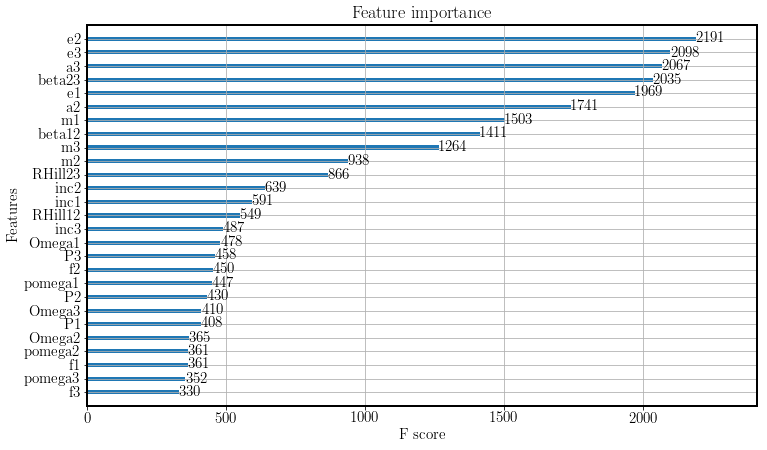

In [8]:
from matplotlib import rc, cm

rc('text',usetex=True)
rc('font',family='serif')
rc('font',serif='cm')
rc('font',size=15,weight='black',stretch='extra-expanded',style='oblique')
rc('axes',linewidth=2)

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(testY, preds)
#print "AUC Score (Train): %f" % metrics.roc_auc_score(df['Stable'], dtrain_predprob)
print "AUC Score (Test): %f" % metrics.average_precision_score(testY, dtest_predprob)

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', pad=3)


xgb.plot_importance(model3, ax = ax,  height = 0.3 )

[ 0.90458751  0.65204066  0.81625295  0.89086705  0.74507201]
5962 9038
5962


(0, 900)

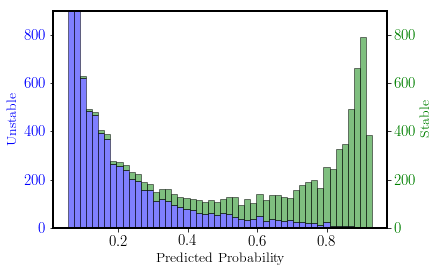

In [9]:
# Histogram:

bins = 50
pred_prob= model3.predict_proba(testX)[:,1]
Stable=pred_prob[np.where(testY==1)]
print Stable[:5][:]
Unstable=pred_prob[np.where(testY==0)]
print Stable.size, Unstable.size

fig, ax1 = plt.subplots()
ax1.hist([Unstable, Stable], bins, alpha=0.5, label='No', color=['blue', 'green'], linewidth = 1, edgecolor='black', histtype='barstacked')
#ax1.hist(Stable, bins, alpha=0.5, label='Yes',color='green', linewidth = 1, edgecolor='black', histtype='barstacked')
print Stable.size
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    

ax2 = ax1.twinx()
#ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green', linewidth = 1, edgecolor='black', histtype='barstacked')
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
 
#ax1.set_ylim(ax2.get_ylim())
ax1.set_ylim([0,900])
ax2.set_ylim([0,900])

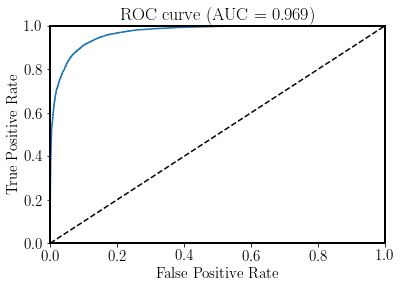

In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, pred_prob)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, dtest_predprob)))

In [11]:
for i in range(0,len(fpr), 10):
    print("Threshold {0}, FPR = {1}, TPR = {2}".format(thresholds[i], fpr[i], tpr[i]))

Threshold 0.930851221085, FPR = 0.0, TPR = 0.000167728950017
Threshold 0.901935756207, FPR = 0.000331931843328, TPR = 0.151962428715
Threshold 0.884623646736, FPR = 0.000885151582208, TPR = 0.273062730627
Threshold 0.874288916588, FPR = 0.00132772737331, TPR = 0.327742368333
Threshold 0.858609318733, FPR = 0.00188094711219, TPR = 0.39500167729
Threshold 0.851627647877, FPR = 0.00254481079885, TPR = 0.419657832942
Threshold 0.840911924839, FPR = 0.00298738658995, TPR = 0.453539080845
Threshold 0.831645786762, FPR = 0.00354060632883, TPR = 0.480375712848
Threshold 0.822130918503, FPR = 0.00409382606771, TPR = 0.507547802751
Threshold 0.811276674271, FPR = 0.00453640185882, TPR = 0.533042603153
Threshold 0.8080727458, FPR = 0.0050896215977, TPR = 0.538745387454
Threshold 0.804082930088, FPR = 0.00586412923213, TPR = 0.547467292855
Threshold 0.800297141075, FPR = 0.00641734897101, TPR = 0.557027843006
Threshold 0.797054350376, FPR = 0.00697056870989, TPR = 0.561556524656
Threshold 0.792910

AUC Score (Test): 0.955607


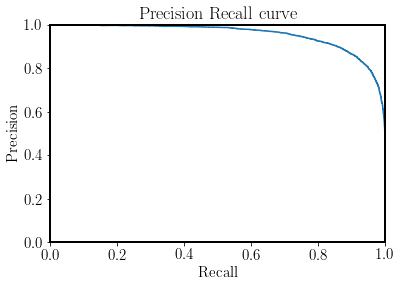

In [12]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(testY, dtest_predprob)
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall curve')
print "AUC Score (Test): %f" % metrics.average_precision_score(testY, dtest_predprob)
